In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', index_col=['ID'], parse_dates=['Date of Commit'])
data.head()

,Message,Author name,Author email,Date of Commit,List of ID of Changed file
ID,,,,,
0,"chore(i18n,client): processed translations (#5...",camperbot,noreply@github.com,2023-05-29 14:38:22,249
1,feat(a11y): make completed-step more accessibi...,Harmeet singh,noreply@github.com,2023-05-28 19:54:02,781
2,chore(deps): update dependency postcss to v8.4.24,renovate[bot],29139614+renovate[bot]@users.noreply.github.com,2023-05-28 10:02:39,260 42705 42934
3,fix(curriculum): proposed fix for some issues ...,DanielRosa74,noreply@github.com,2023-05-28 07:21:35,13562 15672 16054 16359
4,chore(deps): update babel monorepo,renovate[bot],29139614+renovate[bot]@users.noreply.github.com,2023-05-27 15:27:38,260 42270 42704 42705 42934


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26128 entries, 0 to 26127
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Message                     26128 non-null  object        
 1   Author name                 26128 non-null  object        
 2   Author email                26128 non-null  object        
 3   Date of Commit              26128 non-null  datetime64[ns]
 4   List of ID of Changed file  26005 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.2+ MB


In [4]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26005 entries, 0 to 26127
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Message                     26005 non-null  object        
 1   Author name                 26005 non-null  object        
 2   Author email                26005 non-null  object        
 3   Date of Commit              26005 non-null  datetime64[ns]
 4   List of ID of Changed file  26005 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.2+ MB


In [5]:
data.duplicated().value_counts()

False    25942
True        63
dtype: int64

In [6]:
data.drop_duplicates(inplace=True)
data.duplicated().value_counts()

False    25942
dtype: int64

In [7]:
data['Year'] = data['Date of Commit'].dt.year
data['Month'] = data['Date of Commit'].dt.month
data['Day'] = data['Date of Commit'].dt.day
data.head()

,Message,Author name,Author email,Date of Commit,List of ID of Changed file,Year,Month,Day
ID,,,,,,,,
0,"chore(i18n,client): processed translations (#5...",camperbot,noreply@github.com,2023-05-29 14:38:22,249,2023,5,29
1,feat(a11y): make completed-step more accessibi...,Harmeet singh,noreply@github.com,2023-05-28 19:54:02,781,2023,5,28
2,chore(deps): update dependency postcss to v8.4.24,renovate[bot],29139614+renovate[bot]@users.noreply.github.com,2023-05-28 10:02:39,260 42705 42934,2023,5,28
3,fix(curriculum): proposed fix for some issues ...,DanielRosa74,noreply@github.com,2023-05-28 07:21:35,13562 15672 16054 16359,2023,5,28
4,chore(deps): update babel monorepo,renovate[bot],29139614+renovate[bot]@users.noreply.github.com,2023-05-27 15:27:38,260 42270 42704 42705 42934,2023,5,27


In [8]:
data['Amount Changed file'] = data['List of ID of Changed file'].str.count(' ') + 1
data['Pull file'] = data['List of ID of Changed file'].str.count('P')
data.head()

,Message,Author name,Author email,Date of Commit,List of ID of Changed file,Year,Month,Day,Amount Changed file,Pull file
ID,,,,,,,,,,
0,"chore(i18n,client): processed translations (#5...",camperbot,noreply@github.com,2023-05-29 14:38:22,249,2023,5,29,1,0
1,feat(a11y): make completed-step more accessibi...,Harmeet singh,noreply@github.com,2023-05-28 19:54:02,781,2023,5,28,1,0
2,chore(deps): update dependency postcss to v8.4.24,renovate[bot],29139614+renovate[bot]@users.noreply.github.com,2023-05-28 10:02:39,260 42705 42934,2023,5,28,3,0
3,fix(curriculum): proposed fix for some issues ...,DanielRosa74,noreply@github.com,2023-05-28 07:21:35,13562 15672 16054 16359,2023,5,28,4,0
4,chore(deps): update babel monorepo,renovate[bot],29139614+renovate[bot]@users.noreply.github.com,2023-05-27 15:27:38,260 42270 42704 42705 42934,2023,5,27,5,0


In [10]:
data['chore'] = data['Message'].str.contains('chore', case=False)
data['feat'] = data['Message'].str.contains('feat', case=False)
data['fix'] = data['Message'].str.contains('fix', case=False)
data['docs'] = data['Message'].str.contains('docs', case=False)
data['refactor'] = data['Message'].str.contains('refactor', case=False)
data['test'] = data['Message'].str.contains('test', case=False)
data['merge'] = data['Message'].str.contains('merge', case=False)
data['revert'] = data['Message'].str.contains('revert', case=False)
data['misc'] = data['Message'].str.contains('misc', case=False)
data['add'] = data['Message'].str.contains('add', case=False)
data['update'] = data['Message'].str.contains('update', case=False)
data['remove'] = data['Message'].str.contains('remove', case=False)
data['temp'] = data['Message'].str.contains('temp', case=False)
data['Allude'] = data['Message'].str.contains('Allude', case=False)
data['delete'] = data['Message'].str.contains('delete', case=False)
data['correct'] = data['Message'].str.contains('correct', case=False)
data['Change'] = data['Message'].str.contains('Change', case=False)
data['dif'] = ((~data['chore'])&(~data['feat'])&(~data['fix'])&(~data['docs'])&(~data['refactor'])&(~data['test'])&(~data['merge'])&(~data['revert'])&
               (~data['misc'])&(~data['add'])&(~data['update'])&(~data['remove'])&(~data['temp'])&(~data['Allude'])&(~data['delete'])&(~data['correct'])&(~data['Change']))
data

,Message,Author name,Author email,Date of Commit,List of ID of Changed file,Year,Month,Day,Amount Changed file,Pull file,...,misc,add,update,remove,temp,Allude,delete,correct,Change,dif
ID,,,,,,,,,,,,,,,,,,,,,
0,"chore(i18n,client): processed translations (#5...",camperbot,noreply@github.com,2023-05-29 14:38:22,249,2023,5,29,1,0,...,False,False,False,False,False,False,False,False,False,False
1,feat(a11y): make completed-step more accessibi...,Harmeet singh,noreply@github.com,2023-05-28 19:54:02,781,2023,5,28,1,0,...,False,False,False,False,False,False,False,False,False,False
2,chore(deps): update dependency postcss to v8.4.24,renovate[bot],29139614+renovate[bot]@users.noreply.github.com,2023-05-28 10:02:39,260 42705 42934,2023,5,28,3,0,...,False,False,True,False,False,False,False,False,False,False
3,fix(curriculum): proposed fix for some issues ...,DanielRosa74,noreply@github.com,2023-05-28 07:21:35,13562 15672 16054 16359,2023,5,28,4,0,...,False,False,False,False,False,False,False,False,False,False
4,chore(deps): update babel monorepo,renovate[bot],29139614+renovate[bot]@users.noreply.github.com,2023-05-27 15:27:38,260 42270 42704 42705 42934,2023,5,27,5,0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26123,Fix Waypoint Count Backwards Seed Code\r\n\r\n...,Logan Tegman,ltegman@gmail.com,2015-10-28 22:18:20,27625P,2015,10,28,1,1,...,False,False,False,False,False,False,False,False,False,False
26124,Merge pull request #3967 from ltegman/fix/wayp...,Berkeley Martinez,berkeley@robotie.com,2015-10-28 22:01:13,27625P,2015,10,28,1,1,...,False,False,False,False,False,False,True,False,False,False
26125,Fix Waypoint Delete Properties From an Object ...,Logan Tegman,ltegman@gmail.com,2015-10-28 21:33:26,27626P,2015,10,28,1,1,...,False,False,False,False,False,False,True,False,False,False


In [11]:
import re
# a = data['Author email'].str.replace(r'[0-9+a-zA-Z+._-]*@', '@', regex=True).value_counts().index
mail = data['Author email']
mail = mail.str.replace(r'[0-9]*[+]*[a-z]*[[]*[a-z]*[]]*@', '@', regex=True)
mail = mail.str.replace(r'[0-9+a-zA-Z+._-]*@', '@', regex=True)
mail[mail.str.find('@') != 0] = mail[mail.str.find('@') != 0].str.replace(r'[a-zA-Z]*[0-9]*[=]*[ ]*', '', regex=True)
mail[mail.str.find('@') != 0] = mail[mail.str.find('@') != 0].str.replace('', 'different', regex=True)
mail.unique().shape[0]

C:\Users\buisa\miniconda3\lib\site-packages\pandas\core\strings\object_array.py:158: FutureWarning: Possible nested set at position 17
  pat = re.compile(pat, flags=flags)


153

In [12]:
mail.value_counts()[:10]

@users.noreply.github.com    7704
@gmail.com                   7419
@github.com                  7047
@raisedadead.com             1160
@robotie.com                 1001
@erictleung.com               225
@lynxlynx.info                205
@mail.ru                      151
@outlook.com                   98
@yahoo.com                     85
Name: Author email, dtype: int64

In [13]:
data['Author name'].value_counts()

Berkeley Martinez    1273
Mrugesh Mohapatra    1126
camperbot            1114
Renovate Bot         1010
renovate[bot]         861
                     ... 
Martha Custis           1
Minna                   1
Dalton Harmsen          1
Mike R                  1
Nelson Sandoval         1
Name: Author name, Length: 4860, dtype: int64

### Có bao nhiêu người là thành viên của dự án này ?
### Mỗi người họ commit bao nhiêu lần ?

In [14]:
data['Author email'].unique().shape[0]

571

In [15]:
data['Author name'].unique().shape[0]

4860

In [16]:
members = data['Author name'].value_counts()
members

Berkeley Martinez    1273
Mrugesh Mohapatra    1126
camperbot            1114
Renovate Bot         1010
renovate[bot]         861
                     ... 
Martha Custis           1
Minna                   1
Dalton Harmsen          1
Mike R                  1
Nelson Sandoval         1
Name: Author name, Length: 4860, dtype: int64

### Trung bình mỗi người commit bao nhiêu lần ?
### Người nhiều nhất là ai ? Bao nhiêu commit ?
### Tương tự đối với người ít nhất ?

In [17]:
int(members.mean())

5

In [18]:
maxC = members.max()
members[members == maxC]

Berkeley Martinez    1273
Name: Author name, dtype: int64

In [19]:
minC = members.min()
members[members == minC]

HARISH KUMAR  TIWARI    1
Riya Savant             1
SG                      1
mcnorton05              1
Kevin Smith             1
                       ..
Martha Custis           1
Minna                   1
Dalton Harmsen          1
Mike R                  1
Nelson Sandoval         1
Name: Author name, Length: 2180, dtype: int64

### Ai là người có số lần sửa file nhiều nhất ? Số lần sửa file của người đó trong repo là bao nhiêu ?
### Ai là người có số lần sửa file trong repo nhiều nhất ?
** Số lần sửa file bằng tổng số file sửa trong tất cả commit của một người, kể cả việc bị trùng file

In [20]:
changeF = data.melt(id_vars=['Author name'], value_vars=['Amount Changed file'], var_name='State', value_name='Value')
changeF

,Author name,State,Value
0,camperbot,Amount Changed file,1
1,Harmeet singh,Amount Changed file,1
2,renovate[bot],Amount Changed file,3
3,DanielRosa74,Amount Changed file,4
4,renovate[bot],Amount Changed file,5
...,...,...,...
25937,Logan Tegman,Amount Changed file,1
25938,Berkeley Martinez,Amount Changed file,1
25939,Logan Tegman,Amount Changed file,1
25940,Logan Tegman,Amount Changed file,1


In [21]:
changeF = changeF.groupby(by=['Author name', 'State']).sum().reset_index()
changeF

,Author name,State,Value
0,13636592,Amount Changed file,1
1,15jacobj,Amount Changed file,3
2,25Harry,Amount Changed file,1
3,3l3ktron,Amount Changed file,4
4,75072107,Amount Changed file,1
...,...,...,...
4855,Александр Мурзин,Amount Changed file,1
4856,Илья,Amount Changed file,2
4857,Петров Евгений,Amount Changed file,1
4858,范鼎,Amount Changed file,4


In [22]:
changeP = data.melt(id_vars=['Author name'], value_vars=['Pull file'], var_name='State', value_name='Value')
changeP

,Author name,State,Value
0,camperbot,Pull file,0
1,Harmeet singh,Pull file,0
2,renovate[bot],Pull file,0
3,DanielRosa74,Pull file,0
4,renovate[bot],Pull file,0
...,...,...,...
25937,Logan Tegman,Pull file,1
25938,Berkeley Martinez,Pull file,1
25939,Logan Tegman,Pull file,1
25940,Logan Tegman,Pull file,1


In [23]:
changeP = changeP.groupby(by=['Author name', 'State']).sum().reset_index()
changeP

,Author name,State,Value
0,13636592,Pull file,1
1,15jacobj,Pull file,3
2,25Harry,Pull file,1
3,3l3ktron,Pull file,4
4,75072107,Pull file,1
...,...,...,...
4855,Александр Мурзин,Pull file,1
4856,Илья,Pull file,2
4857,Петров Евгений,Pull file,1
4858,范鼎,Pull file,4


In [24]:
maxChF = changeF['Value'].max()
changeF['Author name'][changeF['Value'] == maxChF].iloc[0]

'camperbot'

In [25]:
changeF['Value'][changeF['Value'] == maxChF].iloc[0] - changeP['Value'][changeF['Value'] == maxChF].iloc[0]

42444

In [26]:
changeR = changeF['Value'] - changeP['Value']
maxChR = changeR.max()
changeF['Author name'][changeR == maxChR].iloc[0]

'camperbot'

In [27]:
changeF = data.melt(id_vars=['Author name'], 
                    value_vars=['Amount Changed file'], 
                    var_name='State', value_name='Value')
changeF = changeF.groupby(by=['Author name', 'State']).sum().reset_index()
maxChF = changeF['Value'].max()
changeF['Author name'][changeF['Value'] == maxChF].iloc[0]

'camperbot'

In [28]:
changeP = data.melt(id_vars=['Author name'], 
                    value_vars=['Pull file'], 
                    var_name='State', value_name='Value')
changeP = changeP.groupby(by=['Author name', 'State']).sum().reset_index()
fixAll = changeF['Value'][changeF['Value'] == maxChF].iloc[0]
fixPull = changeP['Value'][changeF['Value'] == maxChF].iloc[0]
fixRepo = fixAll - fixPull
fixRepo

42444

### Bao nhiêu phần trăm trong số các thành viên commit ở repo ít nhất 5 lần ?

In [29]:
repo = data['Amount Changed file'] > data['Pull file']
membersR = data[repo]['Author name'].value_counts()

In [30]:
round(membersR[membersR >= 5].shape[0] / membersR.shape[0] * 100, 2)

9.84

### Năm nào có số lượng commit nhiều nhất ?

In [31]:
data['Year'].value_counts().index[0]

2018

In [32]:
data['Year'].value_counts().iloc[0]

5747

### Trong năm đó, tháng nào có số lượng commit nhiều nhất ?

In [33]:
data['Month'][data['Year'] == 2018].value_counts().index[0]

10

In [34]:
data['Month'][data['Year'] == 2018].value_counts().iloc[0]

1627

### Trong năm đó, loại commit nào chiếm ưu thế ?
### Chiếm bao nhiêu phần trăm ?

In [35]:
data.columns

Index(['Message', 'Author name', 'Author email', 'Date of Commit',
       'List of ID of Changed file', 'Year', 'Month', 'Day',
       'Amount Changed file', 'Pull file', 'chore', 'feat', 'fix', 'docs',
       'refactor', 'test', 'merge', 'revert', 'misc', 'add', 'update',
       'remove', 'temp', 'Allude', 'delete', 'correct', 'Change', 'dif'],
      dtype='object')

In [36]:
year2018 = data.melt(id_vars=['Year'], 
                     value_vars=['chore', 'feat', 'fix', 'docs', 'refactor', 
                                 'test', 'merge', 'revert', 'misc', 
                                 'add', 'update', 'remove', 'temp', 'Allude', 
                                 'delete', 'correct', 'Change', 'dif'],
                     var_name='State', 
                     value_name='Value')
year2018 = year2018.groupby(by=['Year', 'State']).sum().reset_index()
year2018

,Year,State,Value
0,2015,Allude,3
1,2015,Change,61
2,2015,add,339
3,2015,chore,16
4,2015,correct,49
...,...,...,...
157,2023,remove,103
158,2023,revert,29
159,2023,temp,9
160,2023,test,90


In [37]:
maxT2018 = year2018[year2018['Year'] == 2018]['Value'].max()
year2018[(year2018['Year'] == 2018) & (year2018['Value'] == maxT2018)]['State'].iloc[0]

'add'

In [38]:
round(maxT2018 / year2018[(year2018['Year'] == 2018)]['Value'].sum() * 100, 2)

26.24

In [39]:
year2018 = data.melt(id_vars=['Year'], 
                     value_vars=['chore', 'feat', 'fix', 'docs', 'refactor', 
                                 'test', 'merge', 'revert', 'misc', 
                                 'add', 'update', 'remove', 'temp', 'Allude', 
                                 'delete', 'correct', 'Change', 'dif'],
                     var_name='State', 
                     value_name='Value')
year2018 = year2018.groupby(by=['Year', 'State']).sum().reset_index()
maxT2018 = year2018[year2018['Year'] == 2018]['Value'].max()
year2018[(year2018['Year'] == 2018) & (year2018['Value'] == maxT2018)]['State'].iloc[0]

'add'

In [40]:
round(maxT2018 / year2018[(year2018['Year'] == 2018)]['Value'].sum() * 100, 2)

26.24

### Biểu đồ số lượng commit qua từng năm

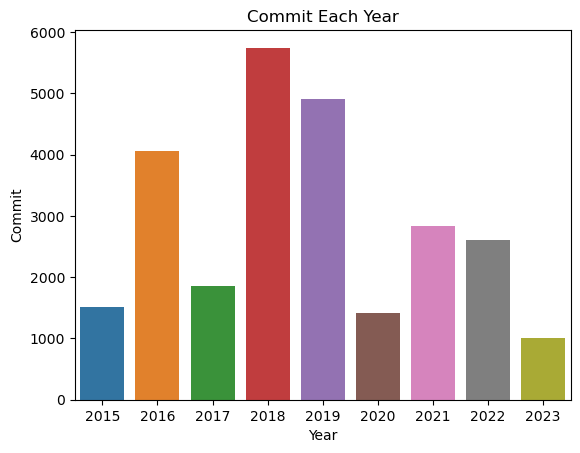

In [41]:
commitEachYear = data['Year'].value_counts()
sns.barplot(x=commitEachYear.index, y=commitEachYear)
plt.xlabel('Year')
plt.ylabel('Commit')
plt.title('Commit Each Year');
plt.savefig('Example/Commit Each Year.png')

### Biểu đồ số commit trong từng tháng của mỗi năm

In [42]:
commitEachMonth = data.groupby(by=['Year', 'Month']).size().reset_index()
commitEachMonth

,Year,Month,0
0,2015,10,136
1,2015,11,593
2,2015,12,783
3,2016,1,864
4,2016,2,532
...,...,...,...
87,2023,1,194
88,2023,2,191
89,2023,3,223
90,2023,4,219


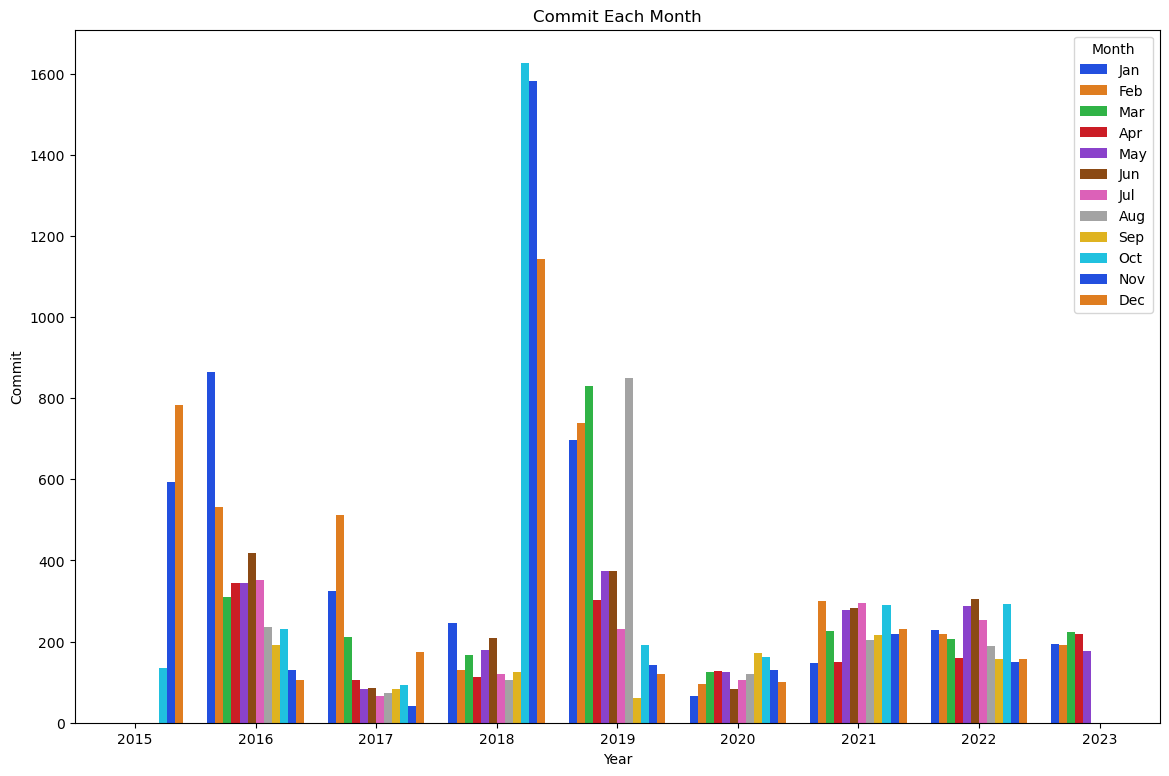

In [43]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(14,9))
ax = sns.barplot(data=commitEachMonth, x='Year', y=0, hue='Month', palette='bright')
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Month", loc='upper right')
plt.ylabel('Commit')
plt.title('Commit Each Month');
plt.savefig('Example/Commit Each Month.png')

### Số file sửa mỗi năm

In [44]:
ChEY = data.melt(id_vars=['Year'], value_vars=['Amount Changed file'], var_name='State', value_name='Value')
ChEY = ChEY.groupby(by=['Year', 'State']).sum().reset_index()
ChEY

,Year,State,Value
0,2015,Amount Changed file,3787
1,2016,Amount Changed file,8597
2,2017,Amount Changed file,5698
3,2018,Amount Changed file,18751
4,2019,Amount Changed file,17711
5,2020,Amount Changed file,15547
6,2021,Amount Changed file,25774
7,2022,Amount Changed file,32882
8,2023,Amount Changed file,19181


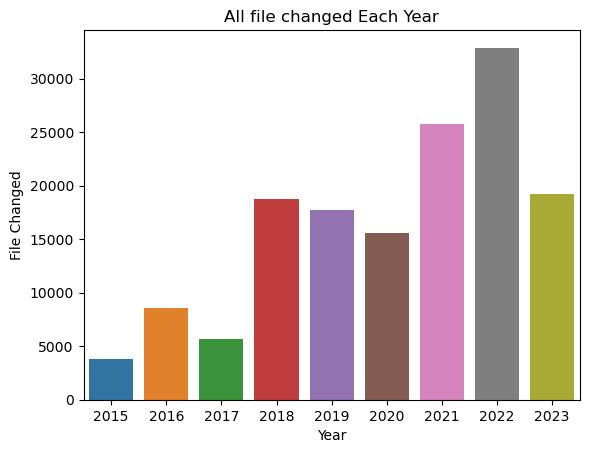

In [45]:
sns.barplot(x=ChEY['Year'], y=ChEY['Value'])
plt.ylabel('File Changed')
plt.title('All file changed Each Year');
plt.savefig('Example/All file changed Each Year.png')

In [52]:
data['Repo file'] = data['Amount Changed file'] - data['Pull file']
repoEM = data.groupby(by=['Year', 'Month']).sum().reset_index()

C:\Users\buisa\AppData\Local\Temp\ipykernel_9348\1333457034.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  repoEM = data.groupby(by=['Year', 'Month']).sum().reset_index()


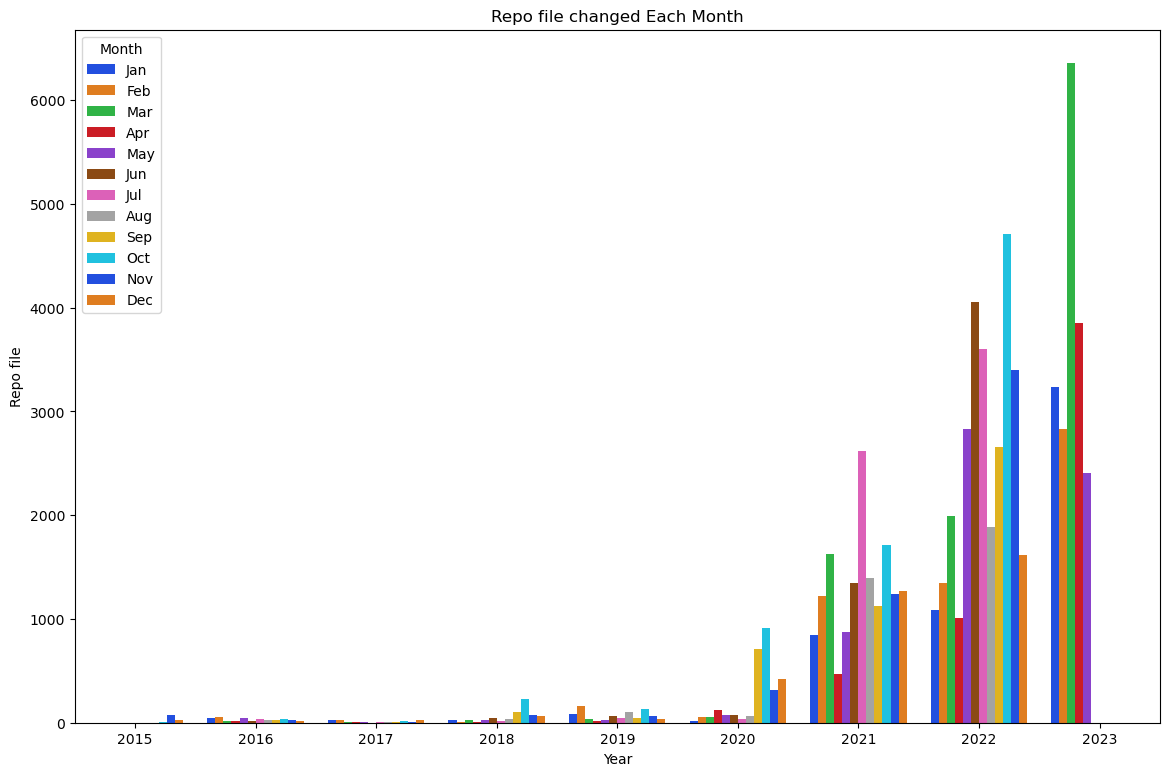

In [53]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(14,9))
ax = sns.barplot(data=repoEM, x='Year', y='Repo file', hue='Month', palette='bright')
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Month", loc='upper left')
plt.title('Repo file changed Each Month');
plt.savefig('Example/Repo file changed Each Month.png')

### Biểu đồ số file trong repo được sửa trong từng năm

In [54]:
repoEY = data.groupby(by=['Year']).sum().reset_index()

C:\Users\buisa\AppData\Local\Temp\ipykernel_9348\361099583.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  repoEY = data.groupby(by=['Year']).sum().reset_index()


C:\Users\buisa\AppData\Local\Temp\ipykernel_9348\2096856428.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=repoEY, x='Year', y='Repo file', palette='bright')


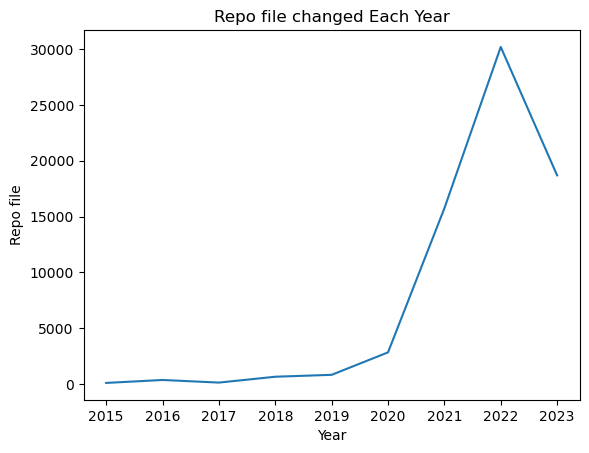

In [55]:
sns.lineplot(data=repoEY, x='Year', y='Repo file', palette='bright')
plt.title("Repo file changed Each Year")
plt.savefig('Example/Repo file changed Each Year.png')

### Biểu đồ số loại commit

In [56]:
TYPE = data.melt(value_vars=['chore', 'feat', 'fix', 'docs',
       'refactor', 'test', 'merge', 'revert', 'misc', 'add', 'update',
       'remove', 'temp', 'Allude', 'delete', 'correct', 'Change', 'dif'])
TYPE = TYPE.groupby(by=['variable']).sum().reset_index()
TYPE

,variable,value
0,Allude,3
1,Change,2621
2,add,6925
3,chore,3889
4,correct,1366
5,delete,167
6,dif,2037
7,docs,1028
8,feat,1810
9,fix,11614


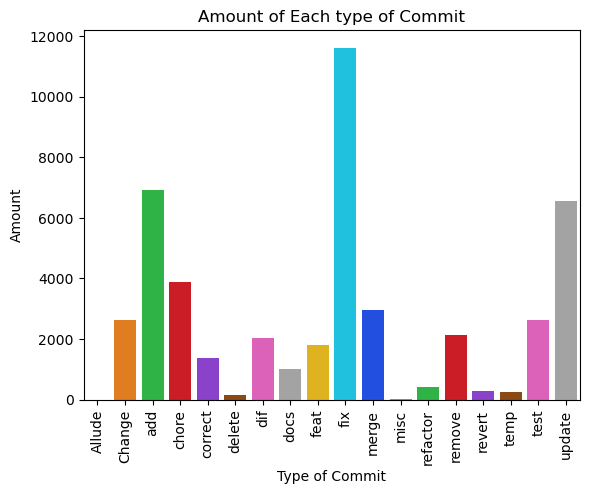

In [57]:
sns.barplot(data=TYPE, x='variable', y='value', palette='bright')
plt.xticks(rotation=90)
plt.xlabel('Type of Commit')
plt.ylabel('Amount')
plt.title('Amount of Each type of Commit')
plt.savefig('Example/Amount of Each type of Commit.png');

### Biểu đồ số commit từng loại qua từng năm

In [58]:
ETEY = data.melt(id_vars=['Year'], value_vars=['chore', 'feat', 'fix', 'docs',
       'refactor', 'test', 'merge', 'revert', 'misc', 'add', 'update',
       'remove', 'temp', 'Allude', 'delete', 'correct', 'Change', 'dif'])
ETEY = ETEY.groupby(by=['Year', 'variable']).sum().reset_index()
ETEY

,Year,variable,value
0,2015,Allude,3
1,2015,Change,61
2,2015,add,339
3,2015,chore,16
4,2015,correct,49
...,...,...,...
157,2023,remove,103
158,2023,revert,29
159,2023,temp,9
160,2023,test,90


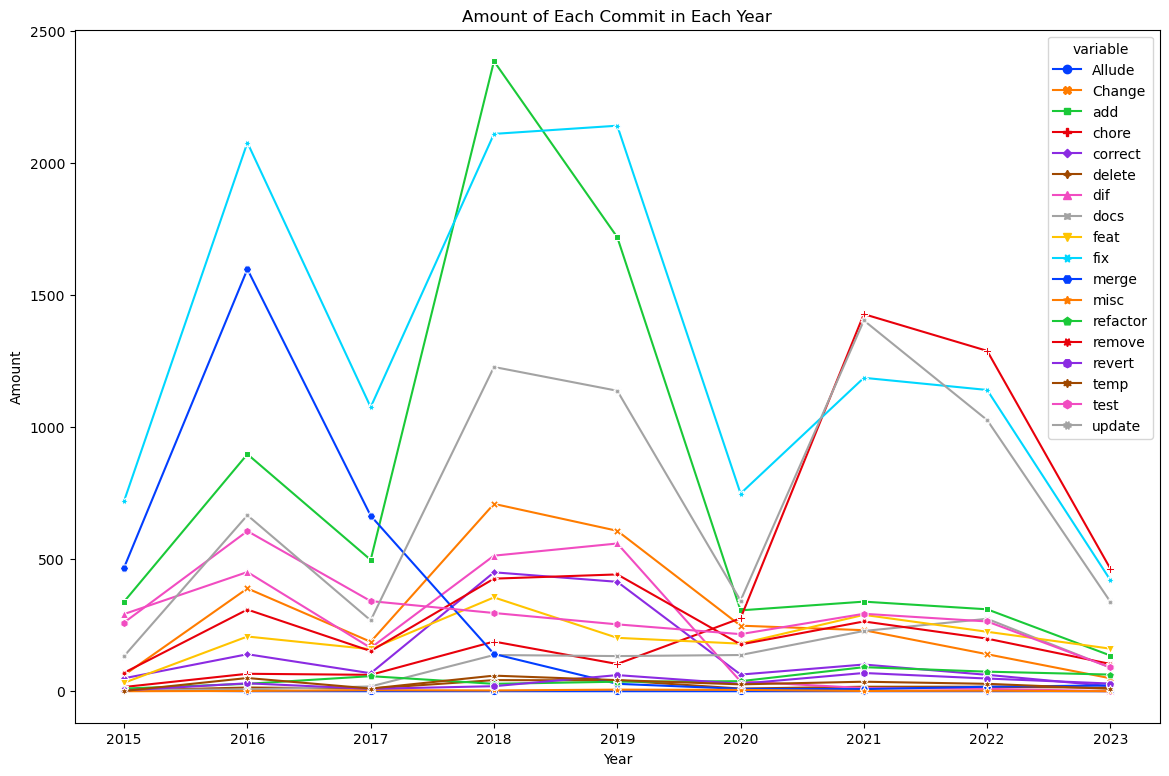

In [59]:
plt.figure(figsize=(14,9))
sns.lineplot(data=ETEY, x='Year', y='value', hue='variable', palette='bright', markers=True, style='variable', dashes=False)
plt.ylabel('Amount')
plt.title('Amount of Each Commit in Each Year')
plt.savefig('Example/Amount of Each Commit in Each Year.png');

In [60]:
ETEYR = data[data['Repo file']>0].melt(id_vars=['Year'], value_vars=['chore', 'feat', 'fix', 'docs',
       'refactor', 'test', 'merge', 'revert', 'misc', 'add', 'update',
       'remove', 'temp', 'Allude', 'delete', 'correct', 'Change', 'dif'])
ETEYR = ETEYR.groupby(by=['Year', 'variable']).sum().reset_index()
ETEYR

,Year,variable,value
0,2015,Allude,0
1,2015,Change,4
2,2015,add,13
3,2015,chore,16
4,2015,correct,1
...,...,...,...
157,2023,remove,101
158,2023,revert,29
159,2023,temp,9
160,2023,test,89


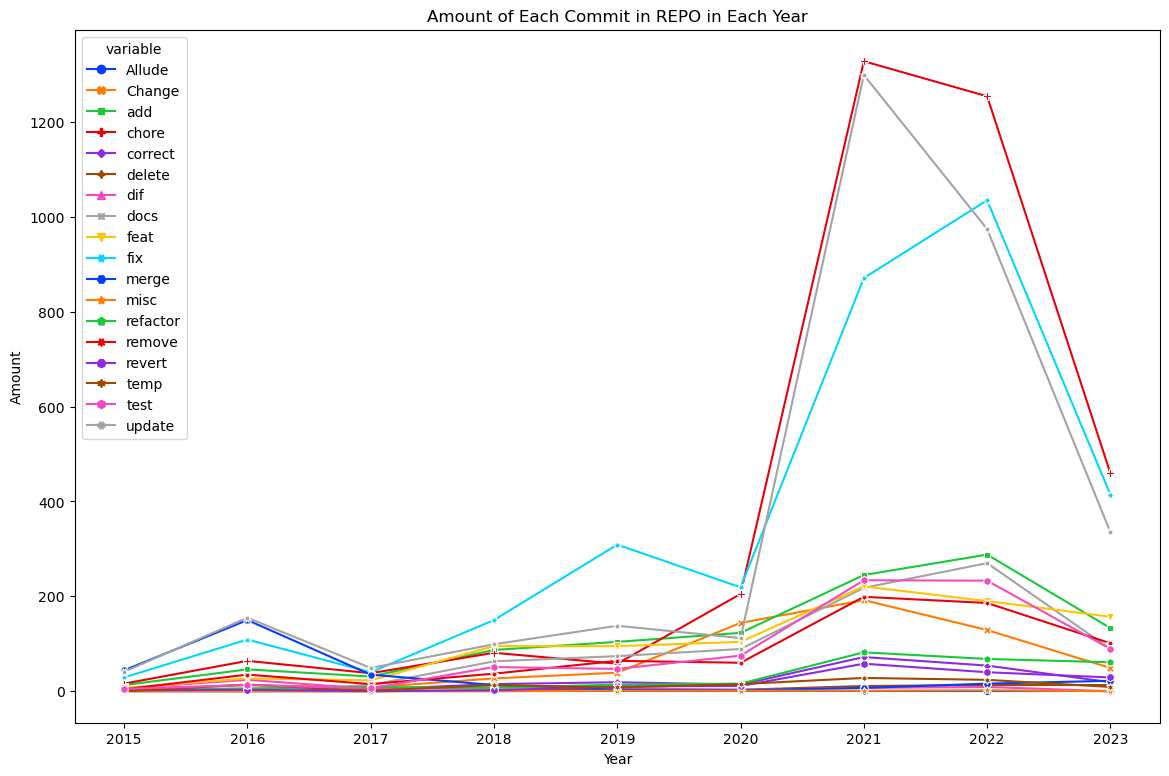

In [61]:
plt.figure(figsize=(14,9))
sns.lineplot(data=ETEYR, x='Year', y='value', hue='variable', palette='bright', markers=True, style='variable', dashes=False)
plt.ylabel('Amount')
plt.title('Amount of Each Commit in REPO in Each Year')
plt.savefig('Example/Amount of Each Commit in REPO in Each Year.png');